In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Feature Selection

In [3]:
# Set features. This will also be used as your x values.
X = df.iloc[:, 1:]
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [4]:
y = df.iloc[:, 0]
print(X.shape, y.shape)

(6991, 40) (6991,)


<AxesSubplot:>

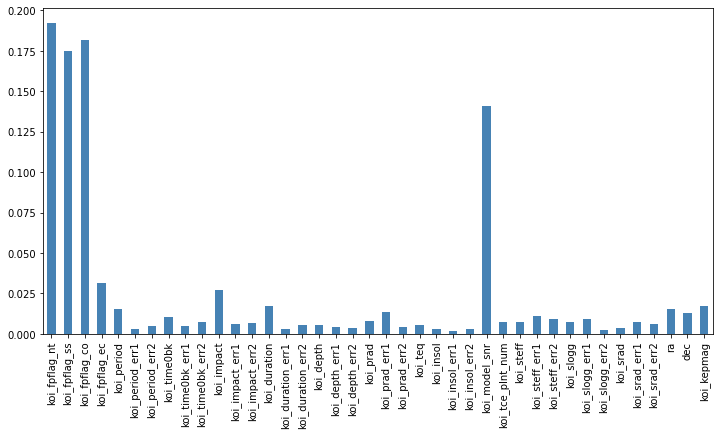

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

clf = DecisionTreeClassifier()
trans = SelectFromModel(clf, threshold='median')
clf.fit(X, y)

pd.Series(clf.feature_importances_, index=df.columns[1:]).plot.bar(color='steelblue', figsize=(12, 6))

# Select your features (columns)

In [6]:
trans = SelectFromModel(clf, threshold='median')
kepler_X_trans = trans.fit_transform(X, y)

In [7]:
columns_retained_FromMode = df.iloc[:, 1:].columns[trans.get_support()].values

In [8]:
columns_retained_FromMode

array(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_time0bk', 'koi_time0bk_err1', 'koi_impact',
       'koi_duration', 'koi_prad', 'koi_prad_err1', 'koi_model_snr',
       'koi_tce_plnt_num', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg_err1', 'koi_srad_err1', 'ra', 'dec', 'koi_kepmag'],
      dtype=object)

In [9]:
X = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_time0bk', 'koi_impact', 'koi_impact_err1',
       'koi_duration', 'koi_prad', 'koi_prad_err1', 'koi_model_snr',
       'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_slogg_err1', 'koi_srad_err1', 'ra', 'dec', 'koi_kepmag']]
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_impact_err1,koi_duration,koi_prad,koi_prad_err1,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_slogg_err1,koi_srad_err1,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,162.513840,0.586,0.059,4.50700,2.83,0.32,25.8,2,5455,81,0.064,0.105,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,175.850252,0.969,5.126,1.78220,14.60,3.92,76.3,1,5853,158,0.044,0.233,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,170.307565,1.276,0.115,2.40641,33.46,8.50,505.6,1,5805,157,0.053,0.201,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,171.595550,0.701,0.235,1.65450,2.75,0.88,40.9,1,6031,169,0.070,0.334,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,172.979370,0.762,0.139,3.14020,2.77,0.90,40.2,2,6046,189,0.054,0.315,296.28613,48.224670,15.714


# Create a Train Test Split

Use `koi_disposition` for the y values

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_impact_err1,koi_duration,koi_prad,koi_prad_err1,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_slogg_err1,koi_srad_err1,ra,dec,koi_kepmag
3563,0,0,0,0,10.548413,139.064020,1.0170,0.0470,1.8720,3.89,0.65,11.7,2,6047,120,0.066,0.181,298.09543,44.737061,13.204
4099,0,0,0,0,24.754385,140.207320,0.7090,0.0230,3.3900,2.10,0.14,18.0,1,4852,144,0.078,0.056,295.73535,42.576248,15.514
5460,0,0,0,0,1.057336,131.792007,0.2620,0.2740,1.5795,14.59,1.15,476.0,1,4664,126,0.054,0.054,292.18417,49.310040,15.414
1091,0,0,0,0,201.118319,187.569860,0.0010,0.4170,10.3280,2.28,0.32,34.7,1,5646,101,0.072,0.135,283.11377,48.131390,13.328
5999,0,0,0,0,91.649983,175.715600,0.2136,0.2282,10.2940,2.27,1.27,8.7,2,6705,164,0.164,0.905,294.93198,39.812420,12.964


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [12]:
# Scale your data
import tensorflow
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400)

In [18]:
rf = rf.fit(X_train_scaled, y_train)

In [19]:
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9096109839816934


In [20]:
predictions = rf.predict(X_test_scaled)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['CONFIRMED' 'FALSE POSITIVE' 'FALSE POSITIVE' 'CONFIRMED'
 'FALSE POSITIVE' 'FALSE POSITIVE' 'FALSE POSITIVE' 'CONFIRMED'
 'CANDIDATE' 'FALSE POSITIVE']
First 10 Actual labels: ['CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE']


In [21]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,CONFIRMED,CONFIRMED
1,FALSE POSITIVE,FALSE POSITIVE
2,FALSE POSITIVE,FALSE POSITIVE
3,CONFIRMED,CONFIRMED
4,FALSE POSITIVE,FALSE POSITIVE
...,...,...
1743,FALSE POSITIVE,FALSE POSITIVE
1744,CONFIRMED,CONFIRMED
1745,FALSE POSITIVE,FALSE POSITIVE
1746,FALSE POSITIVE,FALSE POSITIVE


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [22]:
# Create the GridSearchCV model
from sklearn.svm import SVC
rf = RandomForestClassifier(n_estimators=400)

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid = GridSearchCV(rf, param_grid, verbose=3)

In [26]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto;, score=0.867 total time=   1.9s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto;, score=0.880 total time=   1.8s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto;, score=0.873 total time=   1.9s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto;, score=0.874 total time=   1.9s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto;, score=0.853 total time=   1.9s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt;, score=0.867 total time=   1.9s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt;, score=0.881 total time=   1.9s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt;, score=0.871 total time=   1.9s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt;, score=0.878 total time=   2.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt;, score=0.852 total time=   2.1s
[CV 1/5]

[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2;, score=0.875 total time=   2.7s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2;, score=0.855 total time=   2.7s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto;, score=0.874 total time=   3.2s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto;, score=0.885 total time=   3.2s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto;, score=0.876 total time=   3.2s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto;, score=0.877 total time=   3.1s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto;, score=0.862 total time=   3.3s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt;, score=0.873 total time=   3.2s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt;, score=0.884 total time=   3.1s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt;, score=0.873 total time=   3.1s
[CV 4/5] END criterion=entropy, max_dept

GridSearchCV(estimator=RandomForestClassifier(n_estimators=400),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=3)

In [27]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}
0.8865124182245541


In [28]:
predictions = grid.predict(X_test_scaled)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["confirmed", "false positive", "candidate"]))

                precision    recall  f1-score   support

     confirmed       0.86      0.73      0.79       404
false positive       0.78      0.87      0.82       435
     candidate       0.99      1.00      0.99       909

      accuracy                           0.90      1748
     macro avg       0.87      0.87      0.87      1748
  weighted avg       0.91      0.90      0.90      1748



# Save the Model

In [30]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Angel_Milla2_best_model.sav'
joblib.dump(rf, filename)

['Angel_Milla2.sav']

ERROR! Session/line number was not unique in database. History logging moved to new session 722
